# Modelos Supervisados de Clasificacion
 
Iterando y probando modelos para predecir Deserciónes

In [280]:
import pandas as pd
import numpy as np

In [281]:
df = pd.read_csv('ceiret.csv')
df.drop(['APELLIDO Y NOMBRE', 'PAIS','FECHA NACIMIENTO'], axis=1, inplace= True)

In [282]:
df.head()

,GÉNERO,FECHA DE INSCRIPCION,CÓDIGO POSTAL,CIUDAD,PROVINCIA,Curso,Edad,Hijos,Clase Social,Situación laboral,Nivel educativo,Nivel de alfabetización digital,Herramientas tecnológicas,Conectividad,Deserción
0,F,8/1/1997,C1407,Caba,Buenos Aires,Carpinteria Nivel I,58,1,Marginal,Empleado,Primario,Bajo,Celular,Datos,SI
1,M,7/1/2003,C1407,Caba,Buenos Aires,Carpinteria Nivel I,60,5,Marginal,Empleado,Primario,Bajo,Celular,Datos,SI
2,M,7/1/2003,C1183,Caba,Buenos Aires,Carpinteria Nivel I,65,4,Marginal,Empleado,Primario,Bajo,Celular,Datos,SI
3,F,2/1/2005,B1648,Los Troncos Del Talar,Buenos Aires,Carpinteria Nivel I,63,2,Marginal,Empleado,Primario,Bajo,Celular,Datos,SI
4,F,8/1/2005,C1407,Caba,Buenos Aires,Carpinteria Nivel I,61,4,Marginal,Empleado,Primario,Bajo,Celular,Datos,SI


In [283]:
df['FECHA DE INSCRIPCION'] = df.apply(lambda x: x['FECHA DE INSCRIPCION'].split('/')[2] , axis = 1)
df['CÓDIGO POSTAL'] = df.apply(lambda x: x['CÓDIGO POSTAL'][1:4] , axis = 1)
df['Deserción'] = df.apply(lambda x: 1 if x['Deserción'] == 'SI' else 0, axis = 1)

In [284]:
df.head()

,GÉNERO,FECHA DE INSCRIPCION,CÓDIGO POSTAL,CIUDAD,PROVINCIA,Curso,Edad,Hijos,Clase Social,Situación laboral,Nivel educativo,Nivel de alfabetización digital,Herramientas tecnológicas,Conectividad,Deserción
0,F,1997,140,Caba,Buenos Aires,Carpinteria Nivel I,58,1,Marginal,Empleado,Primario,Bajo,Celular,Datos,1
1,M,2003,140,Caba,Buenos Aires,Carpinteria Nivel I,60,5,Marginal,Empleado,Primario,Bajo,Celular,Datos,1
2,M,2003,118,Caba,Buenos Aires,Carpinteria Nivel I,65,4,Marginal,Empleado,Primario,Bajo,Celular,Datos,1
3,F,2005,164,Los Troncos Del Talar,Buenos Aires,Carpinteria Nivel I,63,2,Marginal,Empleado,Primario,Bajo,Celular,Datos,1
4,F,2005,140,Caba,Buenos Aires,Carpinteria Nivel I,61,4,Marginal,Empleado,Primario,Bajo,Celular,Datos,1


In [285]:
df.Deserción.value_counts()

0    267
1     61
Name: Deserción, dtype: int64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   GÉNERO                           328 non-null    object
 1   FECHA DE INSCRIPCION             328 non-null    object
 2   CÓDIGO POSTAL                    328 non-null    object
 3   CIUDAD                           328 non-null    object
 4   PROVINCIA                        328 non-null    object
 5   Curso                            328 non-null    object
 6   Edad                             328 non-null    int64 
 7   Hijos                            328 non-null    int64 
 8   Clase Social                     328 non-null    object
 9   Situación laboral                328 non-null    object
 10  Nivel educativo                  328 non-null    object
 11  Nivel de alfabetización digital  328 non-null    object
 12  Herramientas tecnológicas        328

In [287]:
df['FECHA DE INSCRIPCION'] = df['FECHA DE INSCRIPCION'].astype(int)
df['CÓDIGO POSTAL'] = df['CÓDIGO POSTAL'].astype(int)

In [288]:
df.drop(['CÓDIGO POSTAL', 'FECHA DE INSCRIPCION'], axis=1, inplace= True)

In [240]:
df.columns

Index(['GÉNERO', 'CIUDAD', 'PROVINCIA', 'Curso', 'Edad', 'Hijos',
       'Clase Social', 'Situación laboral', 'Nivel educativo',
       'Nivel de alfabetización digital', 'Herramientas tecnológicas',
       'Conectividad', 'Deserción'],
      dtype='object')

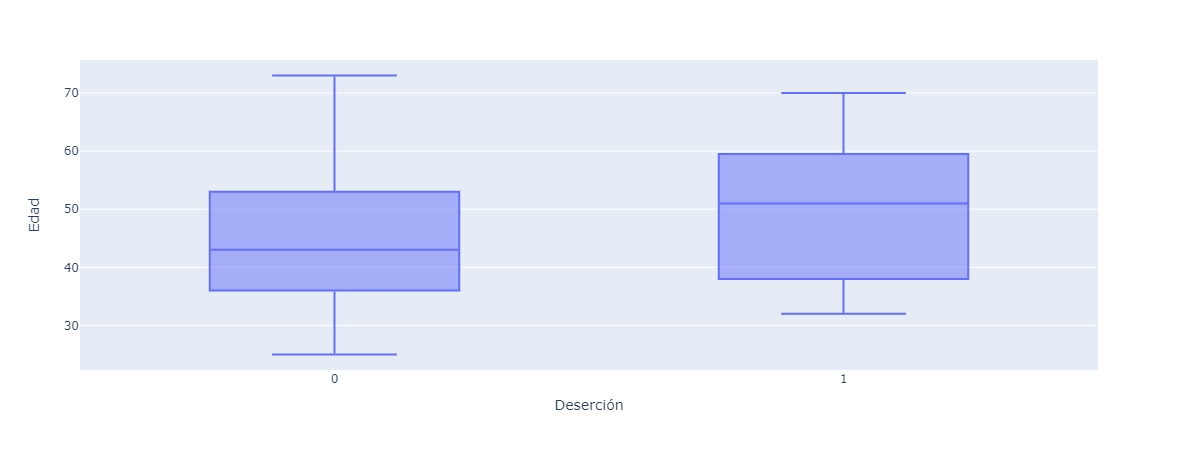

In [241]:
import plotly.express as px

fig = px.box(df, x="Deserción", y="Edad")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

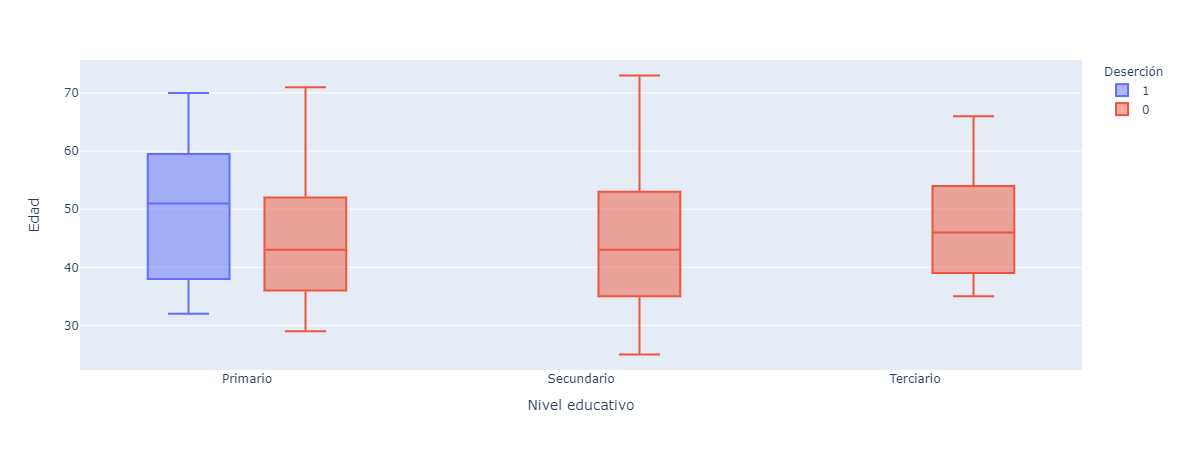

In [242]:
fig = px.box(df, x="Nivel educativo", y="Edad", color="Deserción")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

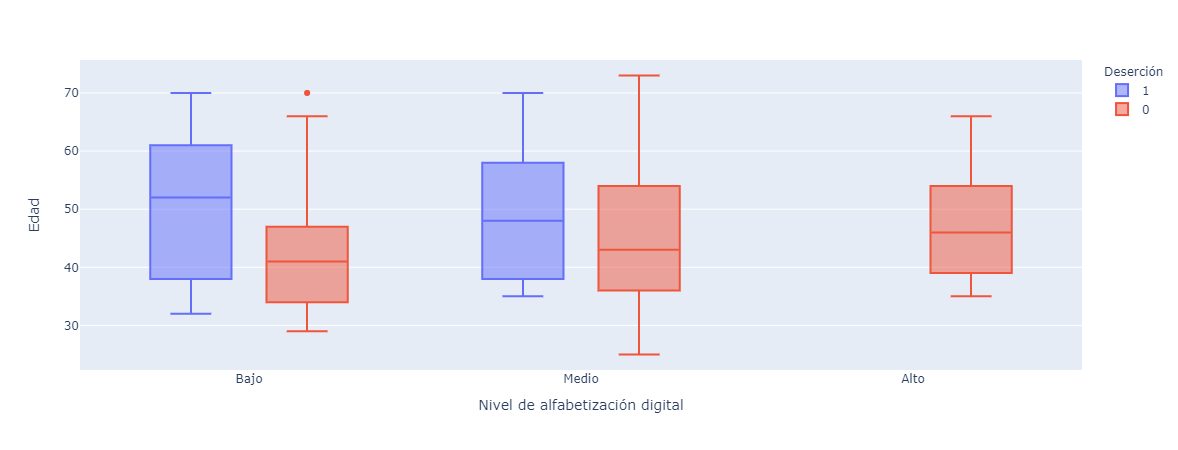

In [243]:
fig = px.box(df, x="Nivel de alfabetización digital", y="Edad", color="Deserción")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

<a id="clf"></a>
### Clasificación de pacientes
Ahora utilizaremos un modelo de vecinos cercanos y una regresión logística como clasificador de personas.
<a id="prep"></a>
#### Preparación de los datos
¿Qué debemos hacer con el dataset antes de entrenar el modelo?
- Crear variables dummies

In [244]:
df.columns

Index(['GÉNERO', 'CIUDAD', 'PROVINCIA', 'Curso', 'Edad', 'Hijos',
       'Clase Social', 'Situación laboral', 'Nivel educativo',
       'Nivel de alfabetización digital', 'Herramientas tecnológicas',
       'Conectividad', 'Deserción'],
      dtype='object')

In [245]:
df = pd.get_dummies(df, drop_first = True)

# Modelo KNN

Para el modelo de vecinos cercanos se hacen iteraciones para ver el K optimo. Este resultado se selecciona mediante los resultados de la validacion cruzada

In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X = df.drop(columns=['Deserción'])
y = df['Deserción']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [247]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)

knn = KNeighborsClassifier()

model = knn.fit(X_train, y_train)

k_range = list(range(1,30))
scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    cv_scores = cross_val_score(knn, X_test, y_test, cv = kf)
    scores.append(np.mean(cv_scores))

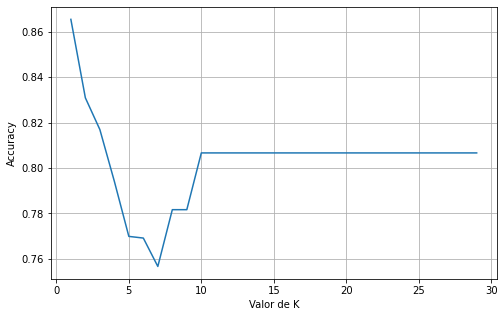

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

El valor optimo de K se encuentra entre 5 y 7.

# Modelo Regresion Logistica

Se utilizan varias iteraciones en el modelo para encontrar el mejor accurracy que nos devuelve la validacion cruzada. (Promedio de 5 folds)

In [249]:
df.head(5)

,Edad,Hijos,Deserción,GÉNERO_M,CIUDAD_Bernal,CIUDAD_Bernal Oeste,CIUDAD_Caba,CIUDAD_Caseros,CIUDAD_Gregorio De Laferrere,CIUDAD_Hurlingham,...,Situación laboral_Recalificado,Nivel educativo_Secundario,Nivel educativo_Terciario,Nivel de alfabetización digital_Bajo,Nivel de alfabetización digital_Medio,Herramientas tecnológicas_No tiene,Herramientas tecnológicas_PC,Herramientas tecnológicas_Tablet,Conectividad_Datos,Conectividad_No tiene
0,58,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,60,5,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,65,4,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,63,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,61,4,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [250]:
# Preparamos la matriz de features y el vector objetivo
X = df.drop(columns=['Deserción'])
y = df['Deserción']

In [251]:
# Separamos un set de testeo para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

<a id="fit"></a>
#### Ajuste del modelo

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits = 5, shuffle = True, random_state = 12)

iteraciones = []
scores = []

for i in range(0, 150):
    i += 10
    lr = LogisticRegression(max_iter = i)
    lr.fit(X_train, y_train)
    iteraciones.append(i)
    cv_scores = cross_val_score(lr, X_test, y_test, cv = kf)
    scores.append(np.mean(cv_scores))

<a id="eval"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance y ver si podemos hacer algo para mejorarlo

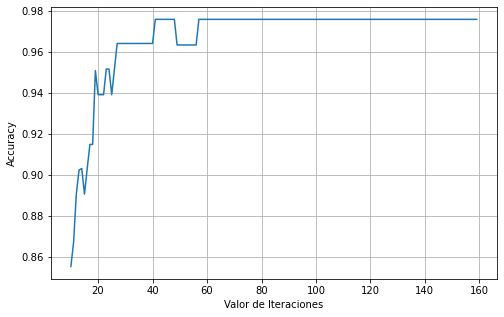

In [253]:
plt.figure(figsize = (8,5))
plt.plot(iteraciones, scores)
plt.xlabel('Valor de Iteraciones'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [254]:
lr = LogisticRegression(max_iter= iteraciones[np.argmax(scores)])
lr.fit(X_train, y_train)

LogisticRegression(max_iter=41)

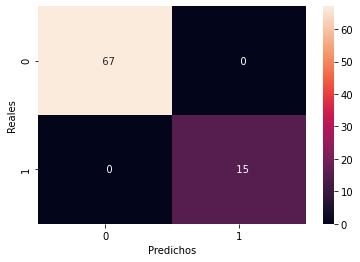

In [255]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt='4d');
plt.xlabel('Predichos');
plt.ylabel('Reales');

In [256]:
accuracy_score(y_test, lr.predict(X_test))

1.0

Importancia de las Variables

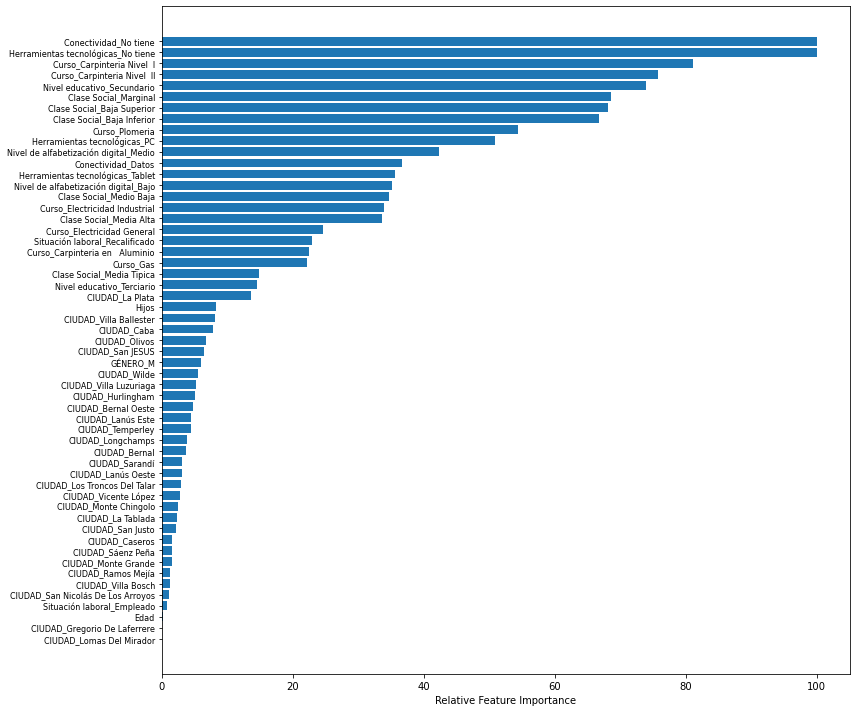

In [257]:
feature_importance = 100.0 * (abs(lr.coef_[0]) / abs(lr.coef_[0]).max())
sorted_idx = np.argsort(feature_importance)
pos = (np.arange(np.argsort(feature_importance).shape[0]) + .5)
featfig = plt.figure(figsize = (12,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()